In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stations = pd.read_json('stations.json.gz', lines=True)
city = pd.read_csv('city_data.csv')

stations['avg_tmax'] = stations['avg_tmax']/10

city = city.dropna()
city['area'] = city['area']/1000000
city.drop(city[city.area > 10000].index, inplace=True)
city['density'] = city['population']/city['area']
# https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula/21623206
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dLat = deg2rad(lat2-lat1)  
    dLon = deg2rad(lon2-lon1) 
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
    d = R * c
    return d * 1000


def deg2rad(deg):
  return deg * (np.pi/180)
stations


,observations,avg_tmax,station,latitude,longitude,elevation
0,300,10.201667,CA001092970,54.4500,-124.2833,691.0
1,320,13.930937,CA003030529,50.0333,-113.2167,967.0
2,273,12.355311,CA004038116,49.0000,-108.3833,902.0
3,220,14.597727,CA007016840,46.5833,-72.2333,16.0
4,326,21.910429,USC00033466,34.5128,-93.0486,190.8
...,...,...,...,...,...,...
9414,366,15.477049,USW00024130,44.8428,-117.8086,1024.4
9415,366,15.690164,USW00054756,42.5700,-72.2911,169.2
9416,366,15.534699,USW00054791,43.2781,-70.9222,98.5
9417,352,18.325852,USW00093786,38.3083,-75.1239,3.7


In [9]:
def distance(city2, stations):
    lat1 = city2['latitude']
    lon1 = city2['longitude']
    lat2 = stations['latitude']
    lon2 = stations['longitude']
    return haversine(lat1, lon1, lat2, lon2)

def best_tmax(city2, stations2):
    stations2.distance = distance(city2, stations2)
    min_ind = stations2.distance.idxmin
    return stations2.loc[min_ind, 'avg_tmax']

city['avg_tmax'] = city.apply(best_tmax, axis=1, stations2=stations)
city

,name,population,area,latitude,longitude,density,avg_tmax
2,Calgary,1096833.0,825.290000,51.054444,-114.066944,1329.027372,12.152329
6,Edmonton,812201.0,684.370000,53.500000,-113.500000,1186.786387,11.098338
18,Abbotsford,133497.0,375.550000,49.054611,-122.328000,355.470643,15.782787
20,Burnaby,223218.0,90.610000,49.250000,-122.949167,2463.502925,13.876667
42,Nanaimo,83811.0,91.000000,49.164167,-123.936389,921.000000,13.864754
...,...,...,...,...,...,...,...
663,Vista,93834.0,48.377000,33.193611,-117.241111,1939.640738,23.347541
664,Renton,90927.0,60.970000,47.486667,-122.195278,1491.340003,17.420219
665,San Angelo,93200.0,150.900000,31.450000,-100.450000,617.627568,26.951366
667,San Juan,355074.0,199.429084,18.450000,-66.066667,1780.452444,30.854913


Text(0, 0.5, 'Population Density (people/km²)')

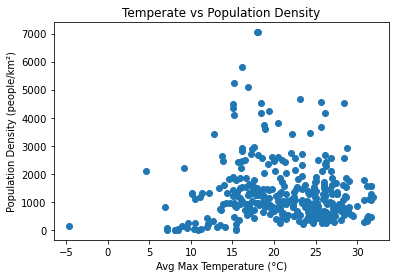

In [7]:
plt.scatter(city.avg_tmax, city.density)
plt.title('Temperate vs Population Density')
plt.xlabel('Avg Max Temperature (\u00b0C)')
plt.ylabel('Population Density (people/km\u00b2)')